In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
#from astropy.constants import G, h, k_B

#imported requests
import requests
#import get()
from simulation_data import get

In [2]:
id = 1
redshift = 2.0
scale_factor = a = 1.0 / (1+redshift)

In [3]:
h = 0.6774
cosmo = FlatLambdaCDM(H0= (h * 100) * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

import h5py
params = {'stars':'Coordinates,GFM_StellarFormationTime'}

url = "http://www.tng-project.org/api/TNG100-1/snapshots/z=" + str(redshift) + "/subhalos/" + str(id)
sub = get(url) # get json response of subhalo properties
saved_filename = get(url + "/cutout.hdf5",params) # get and save HDF5 cutout file

with h5py.File(saved_filename, mode='r') as f: #store as h5py file
    dx = f['PartType4']['Coordinates'][:,0] - sub['pos_x']
    dy = f['PartType4']['Coordinates'][:,1] - sub['pos_y']
    dz = f['PartType4']['Coordinates'][:,2] - sub['pos_z']
    starFormationTime = f['PartType4']['GFM_StellarFormationTime'][:]
#sub['pos_x'], sub['pos_y'], sub['pos_z'] already accounted for 

In [4]:
#print(len(dx))#56139
#print(len(dy))#56139
#print(len(dz))#56139
#print(len(starFormationTime))#56139

In [5]:
distance = (dx**2 + dy**2 + dz**2)**(1/2)
R = distance*a*h #units: physical kpc

In [6]:
z_starFormationTime = 1/starFormationTime -1
Gyr_starFormationTime = cosmo.age(z_starFormationTime).value
Gyr_redshift = cosmo.age(2.0).value
LookbackTime = Gyr_redshift - Gyr_starFormationTime #units: Gyr

C:\Users\debos\anaconda3\lib\site-packages\astropy\cosmology\core.py:1170: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  red, np.inf)[0]
C:\Users\debos\anaconda3\lib\site-packages\numpy\lib\function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


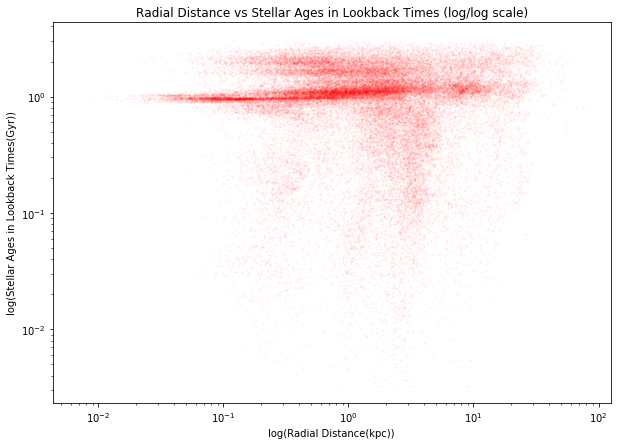

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7)) # 10 is width, 7 is height
plt.plot(R, LookbackTime, 'ro', ms=1, alpha=0.03)
plt.title('Radial Distance vs Stellar Ages in Lookback Times (log/log scale)')
plt.xlabel('log(Radial Distance(kpc))')
plt.ylabel('log(Stellar Ages in Lookback Times(Gyr))')
plt.xscale('log')
plt.yscale('log')

Text(0, 0.5, 'Stellar Ages in Lookback Times(Gyr)')

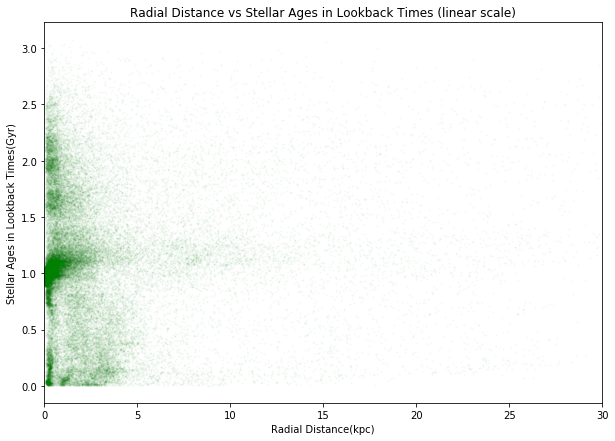

In [8]:
plt.figure(figsize=(10,7)) # 10 is width, 7 is height
plt.plot(R, LookbackTime, 'go', ms=1, alpha=0.03)
plt.title('Radial Distance vs Stellar Ages in Lookback Times (linear scale)')
plt.xlim(0, 30)#cut off plot xlim at x=30kpc to zoom in for clearer features. please remove this line to see all data points
plt.xlabel('Radial Distance(kpc)')
plt.ylabel('Stellar Ages in Lookback Times(Gyr)')

In [9]:
import statistics
R_e = statistics.median(R)

Text(0, 0.5, 'log(Stellar Ages in Lookback Times(Gyr))')

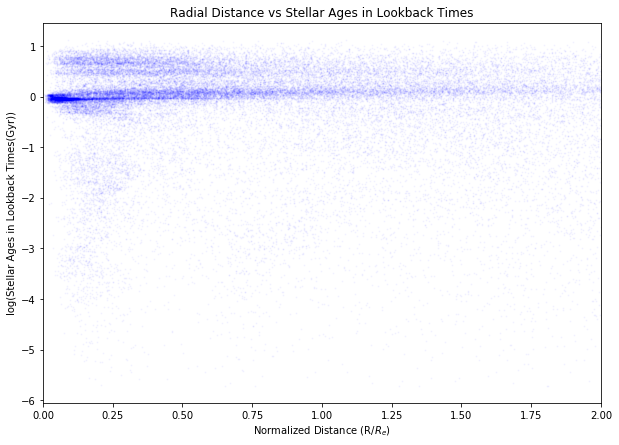

In [10]:
plt.figure(figsize=(10,7)) # 10 is width, 7 is height
plt.plot(R/R_e, np.log(LookbackTime), 'bo', ms=1, alpha=0.03)
plt.title('Radial Distance vs Stellar Ages in Lookback Times')
plt.xlim(0, 2)#cut off plot xlim at x=30R?R_e to match observational plot lims. please remove this line to see all data points
plt.xlabel('Normalized Distance (R/$R_e$)')
plt.ylabel('log(Stellar Ages in Lookback Times(Gyr))')